<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/Adv_CV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coin Classification

## Guidelines
1) Please import packages in the import section only.

2) Use sensible variable names. If possible try to describe the use of the variables in the variable description section.

3) Github commits and branches?

4) set device to gpu. No cpu!


# PIP Install statements

# Import packages here

In [2]:
# write only import statements here
import torch
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
from PIL import Image, ImageEnhance
from tqdm import tqdm
import numpy as np


# Variable Description:

##### Describe the essential variables here. preferable datatype and use. This is to make sure we understand the code we are using
eg: Xtrain: tensor, stores images for training

In [ ]:
print('heelow!')

heelow!


In [ ]:
print("Meeting")

Meeting


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
folder_path = "/content/drive/My Drive/CoinImages"

# Preprocessed images output path
output_path = folder_path + "/Only_Preprocessed_Images"
os.makedirs(output_path, exist_ok=True)

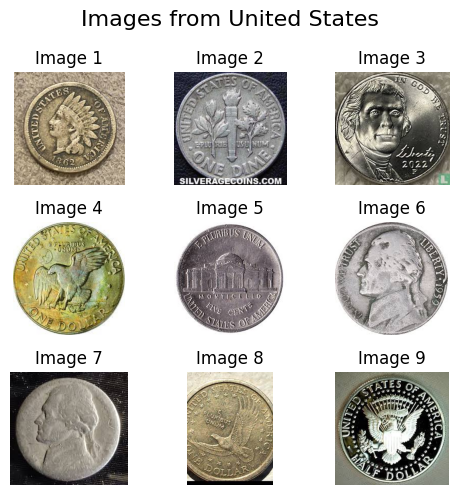

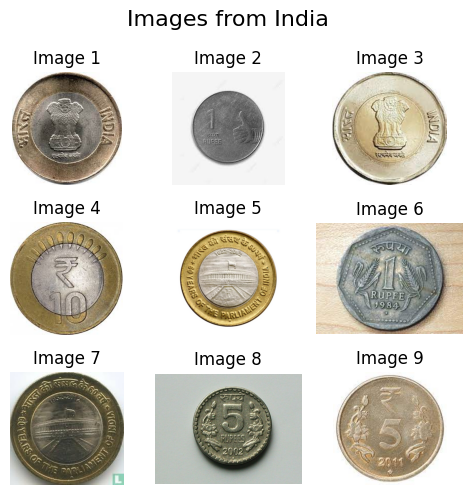

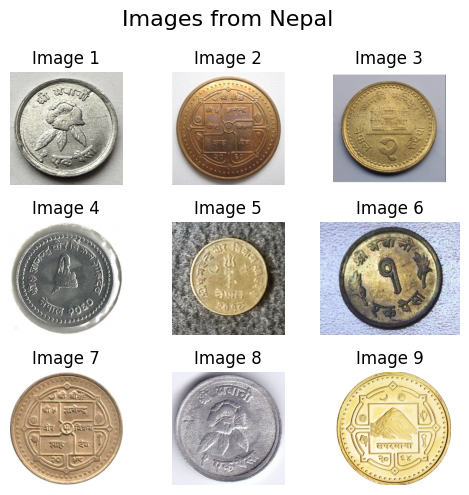

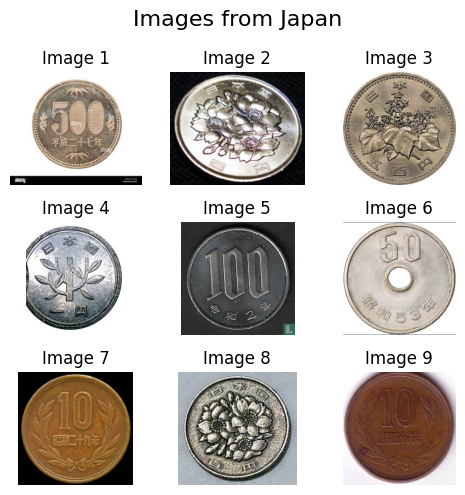

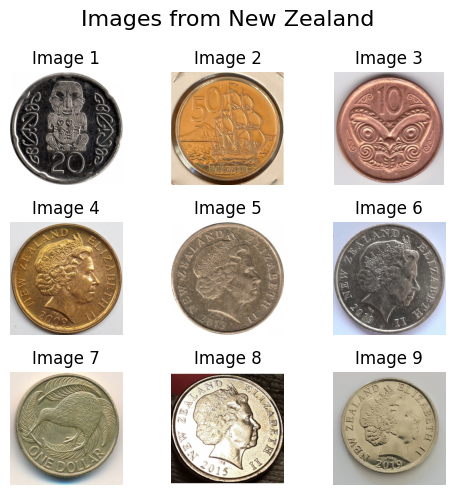

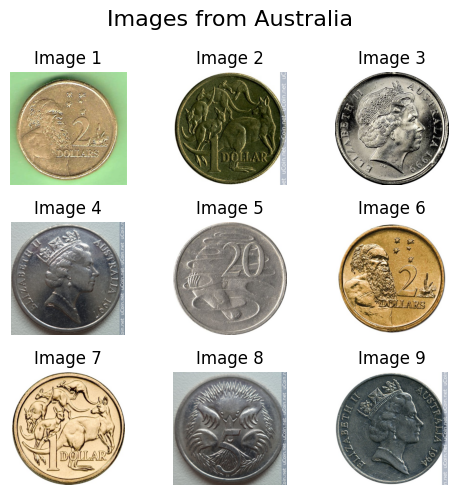

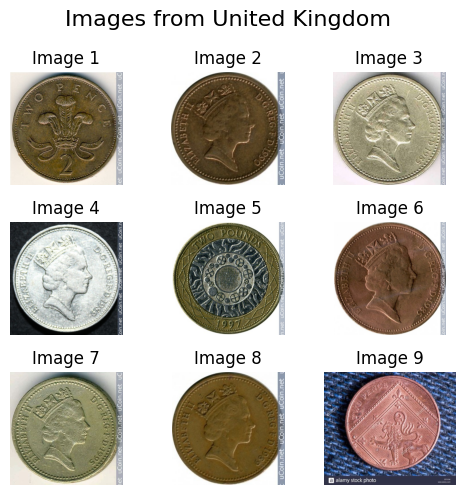

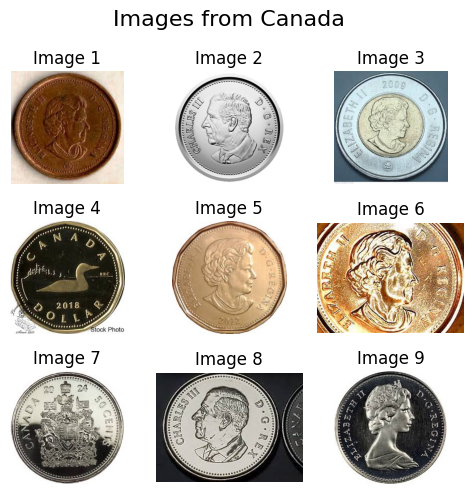

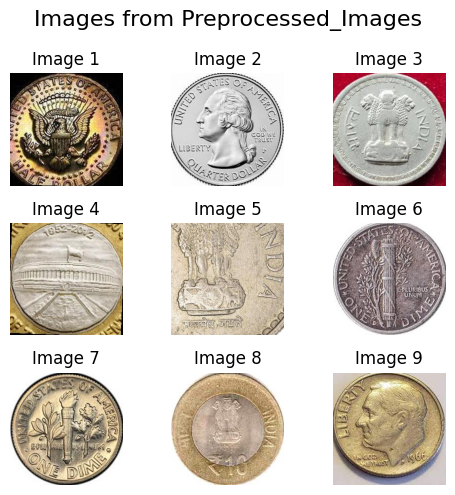

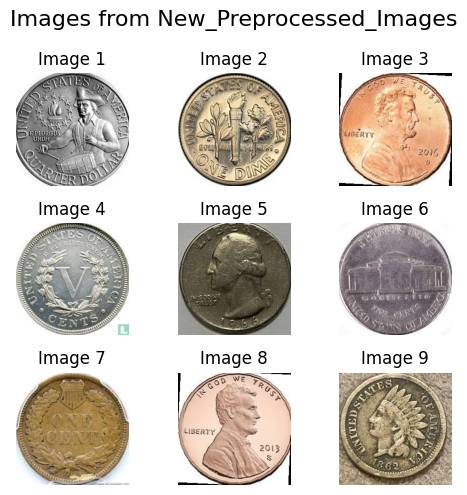

No images found for Only_Preprocessed_Images


In [5]:
#Prerequisite for this cell: Right click on CoinImages in drive. Organize and then add short cut to My Drive
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

country_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Loop through each country folder
for country in country_folders:
    country_path = os.path.join(folder_path, country)

    # Collect all images from this country's subfolders
    image_files = []
    for root, _, files in os.walk(country_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # If no images found, skip this country
    if len(image_files) == 0:
        print(f"No images found for {country}")
        continue

    # Select 9 random images (or fewer if less than 9 exist)
    random_images = random.sample(image_files, min(9, len(image_files)))

    # Display images in a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    fig.suptitle(f"Images from {country}", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(random_images):
            img_path = random_images[i]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
        ax.axis("off")  # Hide axes if no image

    plt.tight_layout()
    plt.show()

# **Data Preprocessing** DRAFT VERSION WILL EDIT LATER

This step will include image preprocessing methodoligies so as to increase the quality of the dataset before the training process. Techniques such as Image size standardization, normalization and augmentation will be used to:
1. Create additional images to bring the image per class count to 50.
2. Bring about variation and diversity in the original dataset, without permanently altering the dataset itself.

Reasons for choosing the steps:
1. Greyscale conversion transforms a three-channel image into a single channel, which helps reduce computational complexity, lower memory usage, and enhance processing speed.
2. Median blur smoothens out the noise from the coin images, while preserving the edge, which will make it easier to apply Hough Circle detection.
3. Hough Circle detection helps to identify and isolate circular regions of interest, such as coins, from the background by detecting prominent circular shapes within an image.

In [6]:
def image_preprocessor(img_path, img_size=(224, 224)):
    """
    Load, crop coin using Hough Circle detection, resize to standard size.
    """
    image = cv2.imread(img_path)
    if image is None:
        return None

    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    median_img = cv2.medianBlur(gray_img, 5)

    circles = cv2.HoughCircles(
        median_img,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=100,
        param1=50,
        param2=30,
        minRadius=50,
        maxRadius=300
    )

    if circles is not None:
        circles = np.around(circles[0, :]).astype("int")
        x, y, r = circles[0]
        x1, y1 = max(x - r, 0), max(y - r, 0)
        x2, y2 = min(x + r, image.shape[1]), min(y + r, image.shape[0])
        coin_image = image[y1:y2, x1:x2]
    else:
        print("No coin detected in:", img_path)
        coin_image = image  # Fallback: use full image

    coin_image = cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB)
    coin_image = Image.fromarray(coin_image)
    final_image = coin_image.resize(img_size, Image.Resampling.LANCZOS)
    return final_image


In [7]:
def save_preprocessed_image(input_path, output_path, output_size=(224, 224)):
    """
    Run preprocessing on image and save it to the mirrored output path.
    """
    coin_img = image_preprocessor(input_path, output_size)
    if coin_img is not None:
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        coin_img.save(output_path)
        print("Saved:", output_path)
    else:
        print("Failed:", input_path)


In [9]:
# Get all country folders
country_folders = [
    f for f in os.listdir(folder_path)
    if os.path.isdir(os.path.join(folder_path, f))
]

# Loop through each country and their subfolders
for country in country_folders:
    country_path = os.path.join(folder_path, country)

    # Process all images inside country's denomination folders
    for root, _, files in os.walk(country_path):
        for file in tqdm(files, desc=f"Processing {country}"):
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                input_path = os.path.join(root, file)

                # Create mirrored output path
                relative_path = os.path.relpath(input_path, folder_path)
                output_folder = os.path.join(output_path, relative_path)

                save_preprocessed_image(input_path, output_folder)

print("Dataset preprocessing completed for all countries.")


Processing United States:   3%|▎         | 1/32 [00:00<00:08,  3.47it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/1h.jpeg


Processing United States:   6%|▋         | 2/32 [00:00<00:08,  3.61it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/1t.jpeg


Processing United States:  12%|█▎        | 4/32 [00:00<00:06,  4.46it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/2t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/2h.jpeg


Processing United States:  16%|█▌        | 5/32 [00:01<00:05,  5.25it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/3h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/3t.jpeg


Processing United States:  28%|██▊       | 9/32 [00:01<00:02,  8.72it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/4t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/5t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/6t.jpeg


Processing United States:  31%|███▏      | 10/32 [00:01<00:03,  6.61it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/7t.jpeg


Processing United States:  34%|███▍      | 11/32 [02:24<12:28, 35.63s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/8t.jpg


Processing United States:  38%|███▊      | 12/32 [02:25<08:47, 26.38s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/9t.jpeg


Processing United States:  41%|████      | 13/32 [02:25<06:05, 19.26s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/10t.jpeg


Processing United States:  44%|████▍     | 14/32 [02:25<04:11, 13.97s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/11t.jpeg


Processing United States:  50%|█████     | 16/32 [02:26<01:55,  7.19s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/12t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/13t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/14t.jpeg


Processing United States:  56%|█████▋    | 18/32 [02:26<00:56,  4.00s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/15t.jpeg


Processing United States:  59%|█████▉    | 19/32 [02:26<00:40,  3.12s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/16t.jpeg


Processing United States:  62%|██████▎   | 20/32 [02:27<00:28,  2.39s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/4h.jpeg


Processing United States:  66%|██████▌   | 21/32 [02:27<00:20,  1.84s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/5h.jpeg


Processing United States:  69%|██████▉   | 22/32 [02:27<00:13,  1.39s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/6h.jpeg


Processing United States:  75%|███████▌  | 24/32 [02:28<00:06,  1.20it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/7h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/8h.jpeg


Processing United States:  78%|███████▊  | 25/32 [02:28<00:04,  1.47it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/9h.jpeg


Processing United States:  84%|████████▍ | 27/32 [02:29<00:02,  2.28it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/10h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/11h.jpeg


Processing United States:  88%|████████▊ | 28/32 [02:29<00:01,  2.73it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/12h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/13h.jpeg


Processing United States:  94%|█████████▍| 30/32 [02:29<00:00,  3.85it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/14h.jpeg


Processing United States:  97%|█████████▋| 31/32 [02:29<00:00,  4.00it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/15h.jpeg


Processing United States: 100%|██████████| 32/32 [02:31<00:00,  4.74s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 5¢/16h.jpg


Processing United States:   4%|▎         | 1/28 [00:00<00:11,  2.45it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/1t.jpeg


Processing United States:   7%|▋         | 2/28 [00:00<00:10,  2.48it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/2t.jpeg


Processing United States:  11%|█         | 3/28 [00:01<00:10,  2.48it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/3t.jpeg


Processing United States:  18%|█▊        | 5/28 [00:01<00:07,  3.19it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/4t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/5t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/6t.jpeg


Processing United States:  25%|██▌       | 7/28 [00:02<00:06,  3.01it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/7t.jpeg


Processing United States:  39%|███▉      | 11/28 [00:03<00:03,  4.70it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/8t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/9t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/10t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/11t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/12t.jpeg


Processing United States:  46%|████▋     | 13/28 [00:03<00:03,  4.29it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/13t.jpeg


Processing United States:  50%|█████     | 14/28 [00:03<00:03,  4.34it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/1h.jpeg


Processing United States:  54%|█████▎    | 15/28 [00:04<00:03,  3.84it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/2h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/3h.jpeg


Processing United States:  64%|██████▍   | 18/28 [00:04<00:02,  4.88it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/4h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/5h.jpeg


Processing United States:  68%|██████▊   | 19/28 [00:04<00:01,  4.77it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/6h.jpeg


Processing United States:  75%|███████▌  | 21/28 [00:05<00:01,  4.30it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/7h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/8h.jpeg


Processing United States:  79%|███████▊  | 22/28 [00:05<00:01,  4.42it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/9h.jpeg


Processing United States:  86%|████████▌ | 24/28 [00:06<00:00,  4.99it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/10h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/11h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/14t.jpeg


Processing United States:  96%|█████████▋| 27/28 [00:06<00:00,  6.76it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/12h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/13h.jpeg


Processing United States: 100%|██████████| 28/28 [00:06<00:00,  4.19it/s]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1¢/14h.jpeg


Processing United States:   4%|▍         | 1/26 [00:00<00:04,  5.50it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/1h.jpeg


Processing United States:   8%|▊         | 2/26 [00:00<00:05,  4.08it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/2h.jpeg


Processing United States:  12%|█▏        | 3/26 [00:00<00:05,  3.86it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/3h.jpeg


Processing United States:  19%|█▉        | 5/26 [00:01<00:04,  4.89it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/4h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/5h.jpeg


Processing United States:  23%|██▎       | 6/26 [00:02<00:12,  1.55it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/6h.jpg


Processing United States:  35%|███▍      | 9/26 [00:03<00:05,  2.98it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/7h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/8h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/9h.jpeg


Processing United States:  42%|████▏     | 11/26 [00:03<00:03,  3.87it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/10h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/11h.jpeg


Processing United States:  50%|█████     | 13/26 [00:04<00:03,  4.01it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/12h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/13h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/1t.jpeg


Processing United States:  58%|█████▊    | 15/26 [00:04<00:02,  4.67it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/2t.jpeg


Processing United States:  62%|██████▏   | 16/26 [00:04<00:02,  4.44it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/3t.jpeg


Processing United States:  65%|██████▌   | 17/26 [00:04<00:02,  4.37it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/4t.jpeg


Processing United States:  73%|███████▎  | 19/26 [00:05<00:01,  4.76it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/5t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/6t.jpeg


Processing United States:  77%|███████▋  | 20/26 [00:05<00:01,  4.00it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/7t.jpeg


Processing United States:  81%|████████  | 21/26 [00:05<00:01,  3.72it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/8t.jpeg


Processing United States:  85%|████████▍ | 22/26 [00:06<00:01,  3.55it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/9t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/10t.jpeg


Processing United States:  92%|█████████▏| 24/26 [00:06<00:00,  4.23it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/11t.jpeg


Processing United States:  96%|█████████▌| 25/26 [00:06<00:00,  4.28it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/12t.jpeg


Processing United States: 100%|██████████| 26/26 [00:07<00:00,  3.67it/s]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 25¢/13t.jpeg


Processing United States:   4%|▍         | 1/26 [00:00<00:07,  3.19it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/1t.jpeg


Processing United States:   8%|▊         | 2/26 [00:00<00:08,  2.87it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/2t.jpeg


Processing United States:  12%|█▏        | 3/26 [00:01<00:08,  2.64it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/3t.jpeg


Processing United States:  15%|█▌        | 4/26 [00:01<00:09,  2.25it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/4t.jpeg


Processing United States:  19%|█▉        | 5/26 [00:02<00:08,  2.35it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/5t.jpeg


Processing United States:  23%|██▎       | 6/26 [00:02<00:08,  2.26it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/6t.jpeg


Processing United States:  27%|██▋       | 7/26 [00:03<00:09,  2.07it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/7t.jpeg


Processing United States:  31%|███       | 8/26 [00:03<00:09,  1.99it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/8t.jpeg


Processing United States:  35%|███▍      | 9/26 [00:05<00:13,  1.27it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/9t.jpg


Processing United States:  38%|███▊      | 10/26 [00:05<00:09,  1.60it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/10t.jpeg


Processing United States:  42%|████▏     | 11/26 [00:05<00:07,  2.01it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/11t.jpeg


Processing United States:  46%|████▌     | 12/26 [00:05<00:06,  2.17it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/12t.jpeg


Processing United States:  54%|█████▍    | 14/26 [00:06<00:04,  2.84it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/13t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/1h.jpeg


Processing United States:  58%|█████▊    | 15/26 [00:06<00:03,  3.62it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/2h.jpeg


Processing United States:  62%|██████▏   | 16/26 [00:06<00:02,  3.60it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/3h.jpeg


Processing United States:  65%|██████▌   | 17/26 [00:07<00:02,  3.43it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/4h.jpeg


Processing United States:  69%|██████▉   | 18/26 [00:07<00:02,  3.52it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/5h.jpeg


Processing United States:  73%|███████▎  | 19/26 [00:08<00:03,  1.99it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/6h.jpg


Processing United States:  77%|███████▋  | 20/26 [00:08<00:02,  2.42it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/7h.jpeg


Processing United States:  85%|████████▍ | 22/26 [00:09<00:01,  3.18it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/8h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/9h.jpeg


Processing United States:  88%|████████▊ | 23/26 [00:09<00:01,  2.97it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/10h.jpeg


Processing United States:  96%|█████████▌| 25/26 [02:47<00:33, 33.46s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/11h.jpg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/12h.jpeg


Processing United States: 100%|██████████| 26/26 [02:50<00:00,  6.57s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 10¢/13h.jpg


Processing United States:   7%|▋         | 2/30 [00:01<00:13,  2.10it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/1h.png
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/2h.jpeg


Processing United States:  13%|█▎        | 4/30 [00:01<00:08,  3.18it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/3h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/4h.jpeg


Processing United States:  17%|█▋        | 5/30 [00:01<00:07,  3.30it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/5h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/6h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/7h.jpeg


Processing United States:  30%|███       | 9/30 [00:05<00:12,  1.63it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/8h.jpg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/9h.jpeg


Processing United States:  33%|███▎      | 10/30 [00:09<00:28,  1.44s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/10h.jpg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/11h.jpeg


Processing United States:  40%|████      | 12/30 [01:18<04:30, 15.04s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/12h.jpg


Processing United States:  43%|████▎     | 13/30 [01:20<03:25, 12.08s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/13h.jpg


Processing United States:  50%|█████     | 15/30 [01:37<02:29,  9.95s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/14h.jpg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/15h.jpeg


Processing United States:  57%|█████▋    | 17/30 [01:45<01:26,  6.68s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/1t.png
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/2t.jpeg


Processing United States:  60%|██████    | 18/30 [01:45<00:58,  4.89s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/3t.jpeg


Processing United States:  67%|██████▋   | 20/30 [01:46<00:25,  2.57s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/4t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/5t.jpeg


Processing United States:  70%|███████   | 21/30 [01:46<00:17,  1.89s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/6t.jpeg


Processing United States:  73%|███████▎  | 22/30 [01:46<00:11,  1.42s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/7t.jpeg


Processing United States:  77%|███████▋  | 23/30 [01:46<00:07,  1.08s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/8t.jpeg


Processing United States:  80%|████████  | 24/30 [01:47<00:05,  1.18it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/9t.jpeg


Processing United States:  83%|████████▎ | 25/30 [01:47<00:03,  1.43it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/10t.jpeg


Processing United States:  87%|████████▋ | 26/30 [01:48<00:02,  1.54it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/11t.jpeg


Processing United States:  90%|█████████ | 27/30 [01:48<00:01,  1.70it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/12t.jpeg


Processing United States:  93%|█████████▎| 28/30 [04:50<01:50, 55.05s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/13t.jpg


Processing United States:  97%|█████████▋| 29/30 [04:51<00:38, 38.82s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/14t.jpeg


Processing United States: 100%|██████████| 30/30 [04:53<00:00,  9.78s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 1$/15t.jpeg


Processing United States:   3%|▎         | 1/30 [00:00<00:17,  1.70it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/1h.jpeg


Processing United States:   7%|▋         | 2/30 [00:01<00:19,  1.47it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/1t.jpeg


Processing United States:  10%|█         | 3/30 [00:02<00:20,  1.32it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/2t.jpeg


Processing United States:  13%|█▎        | 4/30 [00:03<00:22,  1.16it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/3t.jpeg


Processing United States:  17%|█▋        | 5/30 [00:03<00:19,  1.31it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/4t.jpeg


Processing United States:  20%|██        | 6/30 [04:06<33:12, 83.02s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/5t.jpg


Processing United States:  23%|██▎       | 7/30 [04:07<21:33, 56.25s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/6t.jpeg


Processing United States:  27%|██▋       | 8/30 [04:08<14:08, 38.57s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/7t.jpeg


Processing United States:  30%|███       | 9/30 [04:09<09:22, 26.79s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/8t.jpeg


Processing United States:  33%|███▎      | 10/30 [04:10<06:18, 18.93s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/9t.jpeg


Processing United States:  37%|███▋      | 11/30 [04:10<04:11, 13.26s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/10t.jpeg


Processing United States:  40%|████      | 12/30 [04:12<02:52,  9.57s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/11t.jpg


Processing United States:  43%|████▎     | 13/30 [04:13<01:58,  6.97s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/12t.jpeg


Processing United States:  47%|████▋     | 14/30 [04:13<01:21,  5.10s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/13t.jpeg


Processing United States:  50%|█████     | 15/30 [04:14<00:58,  3.87s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/14t.jpeg


Processing United States:  53%|█████▎    | 16/30 [04:15<00:41,  2.95s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/15t.jpeg


Processing United States:  57%|█████▋    | 17/30 [04:16<00:29,  2.25s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/2h.jpeg


Processing United States:  60%|██████    | 18/30 [04:17<00:21,  1.79s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/3h.jpeg


Processing United States:  63%|██████▎   | 19/30 [04:17<00:15,  1.41s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/4h.jpeg


Processing United States:  67%|██████▋   | 20/30 [04:18<00:11,  1.19s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/5h.jpeg


Processing United States:  70%|███████   | 21/30 [04:18<00:09,  1.06s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/6h.jpeg


Processing United States:  73%|███████▎  | 22/30 [04:20<00:08,  1.08s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/7h.jpeg


Processing United States:  77%|███████▋  | 23/30 [04:21<00:07,  1.03s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/8h.jpeg


Processing United States:  80%|████████  | 24/30 [04:21<00:05,  1.07it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/9h.jpeg


Processing United States:  83%|████████▎ | 25/30 [04:22<00:04,  1.07it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/10h.jpg


Processing United States:  87%|████████▋ | 26/30 [04:23<00:03,  1.16it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/11h.jpeg


Processing United States:  90%|█████████ | 27/30 [04:24<00:02,  1.22it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/12h.jpeg


Processing United States:  93%|█████████▎| 28/30 [04:24<00:01,  1.23it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/13h.jpeg


Processing United States:  97%|█████████▋| 29/30 [04:43<00:06,  6.04s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/14h.jpg


Processing United States: 100%|██████████| 30/30 [04:44<00:00,  9.47s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/United States/USD 50¢/15h.jpeg


Processing India:   4%|▍         | 1/26 [00:00<00:21,  1.16it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/1t.jpeg


Processing India:   8%|▊         | 2/26 [00:01<00:19,  1.23it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/2t.jpeg


Processing India:  12%|█▏        | 3/26 [00:02<00:19,  1.20it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/3t.jpeg


Processing India:  15%|█▌        | 4/26 [00:03<00:17,  1.27it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/4t.jpeg


Processing India:  23%|██▎       | 6/26 [00:04<00:12,  1.63it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/5t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/6t.jpeg


Processing India:  27%|██▋       | 7/26 [00:04<00:11,  1.58it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/7t.jpeg


Processing India:  31%|███       | 8/26 [00:05<00:11,  1.60it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/8t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/9t.jpeg


Processing India:  38%|███▊      | 10/26 [00:06<00:08,  2.00it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/10t.jpeg


Processing India:  42%|████▏     | 11/26 [00:07<00:08,  1.80it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/11t.jpeg


Processing India:  46%|████▌     | 12/26 [00:07<00:08,  1.71it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/12t.jpeg


Processing India:  50%|█████     | 13/26 [00:08<00:08,  1.59it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/13t.jpeg


Processing India:  54%|█████▍    | 14/26 [00:09<00:08,  1.50it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/1h.jpeg


Processing India:  58%|█████▊    | 15/26 [00:24<00:53,  4.87s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/2h.jpg


Processing India:  62%|██████▏   | 16/26 [00:25<00:37,  3.77s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/3h.jpeg


Processing India:  65%|██████▌   | 17/26 [00:26<00:26,  2.94s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/4h.jpeg


Processing India:  69%|██████▉   | 18/26 [01:56<03:50, 28.75s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/5h.jpg


Processing India:  73%|███████▎  | 19/26 [02:00<02:29, 21.31s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/6h.jpg


Processing India:  77%|███████▋  | 20/26 [02:00<01:30, 15.03s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/7h.jpeg


Processing India:  81%|████████  | 21/26 [02:01<00:53, 10.79s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/8h.jpeg


Processing India:  85%|████████▍ | 22/26 [02:04<00:33,  8.30s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/9h.jpg


Processing India:  88%|████████▊ | 23/26 [02:06<00:19,  6.61s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/10h.jpeg


Processing India:  92%|█████████▏| 24/26 [02:07<00:09,  4.86s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/11h.jpeg


Processing India:  96%|█████████▌| 25/26 [02:08<00:03,  3.61s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/12h.jpeg


Processing India: 100%|██████████| 26/26 [02:08<00:00,  4.95s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 10Rs/13h.jpeg


Processing India:   3%|▎         | 1/31 [00:00<00:23,  1.27it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/1t.jpeg


Processing India:   6%|▋         | 2/31 [00:01<00:22,  1.28it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/2t.jpeg


Processing India:  10%|▉         | 3/31 [00:02<00:20,  1.36it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/3t.jpeg


Processing India:  13%|█▎        | 4/31 [00:03<00:21,  1.26it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/4t.jpeg


Processing India:  16%|█▌        | 5/31 [00:03<00:21,  1.23it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/5t.jpeg


Processing India:  19%|█▉        | 6/31 [00:04<00:20,  1.21it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/6t.jpeg


Processing India:  26%|██▌       | 8/31 [00:17<01:11,  3.12s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/7t.jpg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/8t.jpeg


Processing India:  29%|██▉       | 9/31 [00:17<00:52,  2.38s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/9t.jpeg


Processing India:  32%|███▏      | 10/31 [00:18<00:40,  1.93s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/10t.jpeg


Processing India:  35%|███▌      | 11/31 [00:19<00:31,  1.56s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/11t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/13t.jpeg


Processing India:  42%|████▏     | 13/31 [00:20<00:18,  1.03s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/12t.jpeg


Processing India:  48%|████▊     | 15/31 [00:21<00:13,  1.21it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/14t.jpeg


Processing India:  52%|█████▏    | 16/31 [00:21<00:10,  1.43it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/15t.jpeg


Processing India:  55%|█████▍    | 17/31 [00:22<00:09,  1.45it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/1h.jpeg


Processing India:  58%|█████▊    | 18/31 [00:23<00:09,  1.41it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/2h.jpeg


Processing India:  61%|██████▏   | 19/31 [00:23<00:08,  1.36it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/3h.jpeg


Processing India:  65%|██████▍   | 20/31 [02:57<07:52, 42.99s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/4h.jpg


Processing India:  68%|██████▊   | 21/31 [02:58<05:10, 31.08s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/5h.jpeg


Processing India:  71%|███████   | 22/31 [02:59<03:21, 22.36s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/6h.jpeg


Processing India:  74%|███████▍  | 23/31 [02:59<02:08, 16.10s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/7h.jpeg


Processing India:  77%|███████▋  | 24/31 [05:32<06:34, 56.32s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/8h.jpg


Processing India:  81%|████████  | 25/31 [05:34<04:00, 40.12s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/9h.jpeg


Processing India:  84%|████████▍ | 26/31 [05:35<02:22, 28.50s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/10h.jpeg


Processing India:  87%|████████▋ | 27/31 [05:36<01:20, 20.20s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/11h.jpeg


Processing India:  90%|█████████ | 28/31 [05:36<00:43, 14.44s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/12h.jpg


Processing India:  94%|█████████▎| 29/31 [05:37<00:20, 10.37s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/13h.jpeg


Processing India:  97%|█████████▋| 30/31 [05:38<00:07,  7.49s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/14h.jpeg


Processing India: 100%|██████████| 31/31 [05:41<00:00, 11.01s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 5Rs/15h.jpg


Processing India:   4%|▍         | 1/26 [00:00<00:15,  1.61it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/1t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/2t.jpeg


Processing India:  12%|█▏        | 3/26 [00:01<00:10,  2.12it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/3t.jpeg


Processing India:  15%|█▌        | 4/26 [00:02<00:15,  1.46it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/4t.jpeg


Processing India:  19%|█▉        | 5/26 [00:03<00:13,  1.51it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/5t.jpeg


Processing India:  23%|██▎       | 6/26 [00:03<00:14,  1.41it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/6t.jpeg


Processing India:  27%|██▋       | 7/26 [00:04<00:14,  1.29it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/7t.jpeg


Processing India:  31%|███       | 8/26 [00:05<00:12,  1.41it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/8t.jpeg


Processing India:  35%|███▍      | 9/26 [00:06<00:13,  1.31it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/9t.jpeg


Processing India:  38%|███▊      | 10/26 [00:06<00:10,  1.46it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/10t.jpeg


Processing India:  42%|████▏     | 11/26 [00:07<00:11,  1.28it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/11t.jpeg


Processing India:  46%|████▌     | 12/26 [00:15<00:40,  2.86s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/12t.jpg


Processing India:  50%|█████     | 13/26 [00:16<00:28,  2.17s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/13t.jpeg


Processing India:  54%|█████▍    | 14/26 [00:16<00:21,  1.78s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/1h.jpeg


Processing India:  58%|█████▊    | 15/26 [02:28<07:28, 40.81s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/2h.jpg


Processing India:  62%|██████▏   | 16/26 [02:29<04:47, 28.73s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/3h.jpeg


Processing India:  69%|██████▉   | 18/26 [02:30<01:54, 14.31s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/4h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/5h.jpeg


Processing India:  73%|███████▎  | 19/26 [02:31<01:11, 10.27s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/6h.jpeg


Processing India:  77%|███████▋  | 20/26 [02:31<00:44,  7.47s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/7h.jpeg


Processing India:  81%|████████  | 21/26 [02:32<00:26,  5.40s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/8h.jpeg


Processing India:  85%|████████▍ | 22/26 [02:33<00:15,  3.96s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/9h.jpeg


Processing India:  88%|████████▊ | 23/26 [02:34<00:09,  3.03s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/10h.jpeg


Processing India:  92%|█████████▏| 24/26 [02:34<00:04,  2.30s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/11h.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/12h.jpeg


Processing India: 100%|██████████| 26/26 [02:35<00:00,  5.98s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 2Rs/13h.jpeg


Processing India:   3%|▎         | 1/31 [00:00<00:25,  1.18it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/1t.jpeg


Processing India:   6%|▋         | 2/31 [00:01<00:26,  1.09it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/2t.jpeg


Processing India:  10%|▉         | 3/31 [00:02<00:23,  1.18it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/3t.jpeg


Processing India:  13%|█▎        | 4/31 [00:03<00:19,  1.35it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/4t.jpeg


Processing India:  16%|█▌        | 5/31 [00:03<00:19,  1.36it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/5t.jpeg


Processing India:  19%|█▉        | 6/31 [00:04<00:17,  1.40it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/6t.jpeg


Processing India:  23%|██▎       | 7/31 [00:05<00:16,  1.43it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/7t.jpeg


Processing India:  26%|██▌       | 8/31 [00:06<00:16,  1.37it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/8t.jpeg


Processing India:  29%|██▉       | 9/31 [00:06<00:15,  1.39it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/9t.jpeg


Processing India:  32%|███▏      | 10/31 [00:07<00:15,  1.37it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/10t.jpeg


Processing India:  35%|███▌      | 11/31 [00:07<00:11,  1.69it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/11t.jpeg


Processing India:  39%|███▊      | 12/31 [00:08<00:12,  1.48it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/12t.jpeg


Processing India:  42%|████▏     | 13/31 [00:09<00:14,  1.27it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/13t.jpeg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/14t.jpeg


Processing India:  48%|████▊     | 15/31 [00:10<00:11,  1.43it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/15t.jpeg


Processing India:  52%|█████▏    | 16/31 [00:11<00:11,  1.25it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/16t.jpeg


Processing India:  55%|█████▍    | 17/31 [00:12<00:11,  1.23it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/1h.jpeg


Processing India:  58%|█████▊    | 18/31 [00:13<00:11,  1.17it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/2h.jpeg


Processing India:  61%|██████▏   | 19/31 [00:14<00:11,  1.07it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/3h.jpeg


Processing India:  65%|██████▍   | 20/31 [00:15<00:10,  1.04it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/4h.jpeg


Processing India:  68%|██████▊   | 21/31 [00:16<00:08,  1.12it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/5h.jpeg


Processing India:  71%|███████   | 22/31 [00:17<00:08,  1.12it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/6h.jpeg


Processing India:  74%|███████▍  | 23/31 [00:18<00:07,  1.04it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/7h.jpeg


Processing India:  77%|███████▋  | 24/31 [00:19<00:05,  1.22it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/8h.jpeg


Processing India:  81%|████████  | 25/31 [00:20<00:05,  1.14it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/9h.jpeg


Processing India:  84%|████████▍ | 26/31 [00:20<00:04,  1.23it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/10h.jpeg


Processing India:  87%|████████▋ | 27/31 [00:21<00:03,  1.18it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/11h.jpeg


Processing India:  90%|█████████ | 28/31 [00:22<00:02,  1.27it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/12h.jpeg


Processing India:  94%|█████████▎| 29/31 [00:23<00:01,  1.23it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/14h.jpeg


Processing India:  97%|█████████▋| 30/31 [00:23<00:00,  1.32it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/15h.jpeg


Processing India: 100%|██████████| 31/31 [00:24<00:00,  1.25it/s]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 1Re/16h.jpeg


Processing India:   4%|▍         | 1/26 [00:00<00:20,  1.25it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/1t.jpeg


Processing India:   8%|▊         | 2/26 [00:01<00:19,  1.20it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/2t.jpeg


Processing India:  12%|█▏        | 3/26 [00:02<00:19,  1.20it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/3t.jpeg


Processing India:  15%|█▌        | 4/26 [00:03<00:15,  1.39it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/4t.jpeg


Processing India:  19%|█▉        | 5/26 [00:03<00:11,  1.83it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/5t.jpeg


Processing India:  23%|██▎       | 6/26 [00:03<00:11,  1.79it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/6t.jpeg


Processing India:  27%|██▋       | 7/26 [00:04<00:12,  1.53it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/7t.jpeg


Processing India:  31%|███       | 8/26 [00:05<00:11,  1.57it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/8t.jpeg


Processing India:  35%|███▍      | 9/26 [00:06<00:11,  1.49it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/9t.jpeg


Processing India:  38%|███▊      | 10/26 [00:08<00:18,  1.19s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/10t.jpg


Processing India:  42%|████▏     | 11/26 [00:09<00:15,  1.06s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/11t.jpeg


Processing India:  46%|████▌     | 12/26 [00:09<00:13,  1.03it/s]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/12t.jpeg


Processing India:  50%|█████     | 13/26 [00:11<00:14,  1.09s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/13t.jpeg


Processing India:  54%|█████▍    | 14/26 [00:12<00:15,  1.26s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/1h.png


Processing India:  58%|█████▊    | 15/26 [00:13<00:12,  1.16s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/2h.jpeg


Processing India:  62%|██████▏   | 16/26 [00:14<00:10,  1.03s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/3h.jpeg


Processing India:  65%|██████▌   | 17/26 [04:36<11:56, 79.58s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/4h.jpg


Processing India:  69%|██████▉   | 18/26 [04:41<07:36, 57.00s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/5h.png


Processing India:  73%|███████▎  | 19/26 [04:41<04:40, 40.01s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/6h.jpeg


Processing India:  81%|████████  | 21/26 [05:50<02:50, 34.08s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/7h.jpg
Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/8h.jpeg


Processing India:  85%|████████▍ | 22/26 [05:57<01:43, 25.89s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/9h.png


Processing India:  88%|████████▊ | 23/26 [07:16<02:05, 41.89s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/10h.jpg


Processing India:  92%|█████████▏| 24/26 [07:17<00:59, 29.60s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/11h.jpeg


Processing India: 100%|██████████| 26/26 [07:19<00:00, 16.90s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/India/INR 20Rs/12h.jpeg


Processing Nepal: 0it [00:00, ?it/s]
Processing Nepal:   3%|▎         | 1/34 [00:04<02:19,  4.23s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/1h.jpg


Processing Nepal:   6%|▌         | 2/34 [00:21<06:27, 12.11s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/1t.jpg


Processing Nepal:   9%|▉         | 3/34 [01:47<23:37, 45.73s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/2h.jpg


Processing Nepal:  12%|█▏        | 4/34 [02:02<16:42, 33.42s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/2t.jpg


Processing Nepal:  15%|█▍        | 5/34 [02:05<10:50, 22.43s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/3t.jpg


Processing Nepal:  18%|█▊        | 6/34 [03:11<17:25, 37.34s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/3h.jpg


Processing Nepal:  21%|██        | 7/34 [03:20<12:43, 28.28s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/4t.jpg


Processing Nepal:  24%|██▎       | 8/34 [03:28<09:27, 21.81s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/4h.jpg


Processing Nepal:  26%|██▋       | 9/34 [03:37<07:18, 17.53s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/5h.jpg


Processing Nepal:  29%|██▉       | 10/34 [03:42<05:27, 13.66s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/5t.jpg


Processing Nepal:  32%|███▏      | 11/34 [03:47<04:16, 11.14s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/6h.jpg


Processing Nepal:  35%|███▌      | 12/34 [03:51<03:16,  8.94s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/6t.jpg


Processing Nepal:  38%|███▊      | 13/34 [04:08<04:01, 11.48s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/7h.jpg


Processing Nepal:  41%|████      | 14/34 [04:23<04:11, 12.56s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/7t.jpg


Processing Nepal:  44%|████▍     | 15/34 [04:26<03:03,  9.66s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/8h.jpg


Processing Nepal:  47%|████▋     | 16/34 [04:32<02:35,  8.65s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/8t.jpg


Processing Nepal:  50%|█████     | 17/34 [04:47<02:56, 10.40s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/9t.jpg


Processing Nepal:  53%|█████▎    | 18/34 [05:02<03:08, 11.77s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/9h.jpg


Processing Nepal:  56%|█████▌    | 19/34 [05:08<02:29,  9.94s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/10t.jpg


Processing Nepal:  59%|█████▉    | 20/34 [05:14<02:04,  8.86s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/10h.jpg


Processing Nepal:  62%|██████▏   | 21/34 [05:23<01:54,  8.84s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/11t.jpg


Processing Nepal:  65%|██████▍   | 22/34 [05:34<01:53,  9.45s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/11h.jpg


Processing Nepal:  68%|██████▊   | 23/34 [06:20<03:46, 20.57s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/12t.jpg


Processing Nepal:  71%|███████   | 24/34 [07:19<05:21, 32.13s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/12h.jpg


Processing Nepal:  74%|███████▎  | 25/34 [07:30<03:52, 25.79s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/13t.jpg


Processing Nepal:  76%|███████▋  | 26/34 [07:41<02:50, 21.36s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/13h.jpg


Processing Nepal:  79%|███████▉  | 27/34 [07:49<02:00, 17.23s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/14t.jpg


Processing Nepal:  82%|████████▏ | 28/34 [07:54<01:22, 13.70s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/14h.jpg


Processing Nepal:  85%|████████▌ | 29/34 [07:59<00:54, 11.00s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/15t.jpg


Processing Nepal:  88%|████████▊ | 30/34 [08:05<00:37,  9.39s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/15h.jpg


Processing Nepal:  91%|█████████ | 31/34 [08:06<00:21,  7.11s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/16t.jpg


Processing Nepal:  94%|█████████▍| 32/34 [08:08<00:10,  5.43s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/16h.jpg


Processing Nepal:  97%|█████████▋| 33/34 [08:23<00:08,  8.43s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/17h.jpg


Processing Nepal: 100%|██████████| 34/34 [08:38<00:00, 15.25s/it]


Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/2  Nepali Rupee/17t.jpg


Processing Nepal:   2%|▏         | 1/50 [00:04<03:39,  4.47s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/1h.jpg


Processing Nepal:   4%|▍         | 2/50 [00:10<04:22,  5.47s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/1t.jpg


Processing Nepal:   6%|▌         | 3/50 [00:14<03:46,  4.82s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/2h.jpg


Processing Nepal:   8%|▊         | 4/50 [00:19<03:38,  4.75s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/2t.jpg


Processing Nepal:  10%|█         | 5/50 [00:25<03:58,  5.31s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/3h.jpg


Processing Nepal:  12%|█▏        | 6/50 [00:31<04:00,  5.47s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/3t.jpg


Processing Nepal:  14%|█▍        | 7/50 [00:36<03:46,  5.27s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/4h.jpg


Processing Nepal:  16%|█▌        | 8/50 [00:40<03:26,  4.93s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/4t.jpg


Processing Nepal:  18%|█▊        | 9/50 [00:42<02:51,  4.17s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/5h.jpg


Processing Nepal:  20%|██        | 10/50 [00:46<02:39,  3.98s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/5t.jpg


Processing Nepal:  22%|██▏       | 11/50 [01:02<04:56,  7.61s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/6h.jpg


Processing Nepal:  24%|██▍       | 12/50 [01:16<06:00,  9.50s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/6t.jpg


Processing Nepal:  26%|██▌       | 13/50 [01:17<04:18,  7.00s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/7h.jpg


Processing Nepal:  28%|██▊       | 14/50 [01:17<02:59,  4.99s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/7t.jpg


Processing Nepal:  30%|███       | 15/50 [01:21<02:44,  4.70s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/8h.jpg


Processing Nepal:  32%|███▏      | 16/50 [01:25<02:33,  4.52s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/8t.jpg


Processing Nepal:  34%|███▍      | 17/50 [01:31<02:44,  4.98s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/9t.jpg


Processing Nepal:  36%|███▌      | 18/50 [01:36<02:35,  4.87s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/9h.jpg


Processing Nepal:  38%|███▊      | 19/50 [01:38<01:59,  3.87s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/10h.jpg


Processing Nepal:  40%|████      | 20/50 [01:40<01:39,  3.32s/it]

Saved: /content/drive/My Drive/CoinImages/Only_Preprocessed_Images/Nepal/25 Nepali Paisa/10t.jpg


Processing Nepal:  40%|████      | 20/50 [02:21<03:32,  7.08s/it]


KeyboardInterrupt: 

In [4]:
# def image_preprocessor(img_path, img_size = (224,224)):
#   """
#   The function will load a coin image, detect the coin via Hough Circle detection,
#   crop to the coin area, and resize to the desired output size.
#   """
#   image = cv2.imread(img_path)
#   if image is None:
#     return None

#   # Greyscale Conversion
#   gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#   # Median
#   median_img = cv2.medianBlur(gray_img, 5)

#   # Hough Circle Detectoin
#   circles = cv2.HoughCircles(
#       median_img,
#       cv2.HOUGH_GRADIENT,
#         dp=1.2,
#         minDist=100,
#         param1=50,
#         param2=30,
#         minRadius=50,
#         maxRadius=300
#     )

#   # Using the first circle found if other circles are detected
#   if circles is not None:
#     circles = np.around(circles[0, :]).astype("int")
#     x, y, r = circles[0]
#     x1 = max(x - r, 0)
#     y1 = max(y - r, 0)
#     x2 = min(x + r, img.shape[1])
#     y2 = min(y + r, img.shape[0])
#     coin_image = img[y1:y2, x1:x2]

#     # If no circle is detected, use the original image
#   else:
#     print("No coin detected in ", img_path)
#     coin_image = image

#   # Conversion from BGR to RGB
#   coin_image = cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB)
#   coin_image = Image.fromarray(coin_image)

#   # Resizing to the image to a standard size of 224x224
#   final_image = coin_image.resize(img_size)
#   return final_image